# Практика

## Определение вероятности. События

Требуется сгенерировать необходимые выборки и произвести по ним расчеты

### Задача 1
Брошено две монеты. Найти вероятность того, что монеты выпали разными сторонами

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [19]:
# n — число благоприятных элементарных исходов n = 2
n = 2
# N — это суммарное число элементарных исходов N = 4 ['OP','PO','OO','PP']
all_N = 4
# P(A) = n/N
P_A = n/all_N
print('Вероятность того, что монеты выпали разными сторонами', P_A)

Вероятность того, что монеты выпали разными сторонами 0.5


In [22]:
N = 10000
sample = np.random.choice(['OP','PO','OO','PP'], N)
sample

array(['OP', 'OP', 'OP', ..., 'PO', 'OP', 'OP'], dtype='<U2')

In [23]:
# оценим функцию вероятности частотами
unique_value, counts = np.unique(sample, return_counts=True)
v = counts / N
print(counts)
print(counts / N)
print(unique_value)
print (np.sum(counts / N))

[2460 2500 2562 2478]
[0.246  0.25   0.2562 0.2478]
['OO' 'OP' 'PO' 'PP']
1.0


In [24]:
df = pd.DataFrame(list(zip(unique_value, v)), columns =['Исход', 'Вероятность'])
df

,Исход,Вероятность
0,OO,0.2460
1,OP,0.2500
2,PO,0.2562
3,PP,0.2478


In [26]:
A_dic = {'OO': 'false_choice', 'PP': 'false_choice', 'OP': 'true_choice', 'PO': 'true_choice'}

In [27]:
a = df.replace(regex=A_dic).copy()
print('Вероятность того, что монеты выпали разными сторонами (практическая):', pd.pivot_table(a, index=["Исход"], values=["Вероятность"], aggfunc=np.sum)["Вероятность"].true_choice)
print('Вероятность того, что монеты выпали разными сторонами (теоретическая):', P_A)

Вероятность того, что монеты выпали разными сторонами (практическая): 0.5062
Вероятность того, что монеты выпали разными сторонами (теоретическая): 0.5


### Задача 2
Брошено три монеты. Описать множество всех элементарных событий. Найти вероятности следующих событий:


1.   A = {не выпало ни одного герба}
2.   B = {выпало четное число гербов}
3.   C = {на третьей монете выпал герб}


In [29]:
# A = {не выпало ни одного герба} nA — число благоприятных элементарных исходов = 1 
nA = 1
# B = {выпало четное число гербов} nB — число благоприятных элементарных исходов = 3
nB = 3
# C = {на третьей монете выпал герб} nC — число благоприятных элементарных исходов = 4
nC = 4
# N — это суммарное число элементарных исходов N = 8 ['OOO','OOP','OPO','OPP','POO','POP','PPO','PPP']
all_N = 8
# P(A) = n/N
P_A = nA/all_N
print('Вероятность, что не выпало ни одного герба:',P_A)
P_B = nB/all_N
print('Вероятность, что выпало четное число гербов:',P_B)
P_C = nC/all_N
print('Вероятность, что на третьей монете выпал герб:',P_C)

Вероятность, что не выпало ни одного герба: 0.125
Вероятность, что выпало четное число гербов: 0.375
Вероятность, что на третьей монете выпал герб: 0.5


In [30]:
N = 10000
sample = np.random.choice(['OOO','OOP','OPO','OPP','POO','POP','PPO','PPP'], N)
sample

array(['OPO', 'POO', 'OPO', ..., 'POO', 'OPO', 'OOP'], dtype='<U3')

In [31]:
# оценим функцию вероятности частотами
unique_value, counts = np.unique(sample, return_counts=True)
v = counts / N
print(counts)
print(counts / N)
print(unique_value)
print (np.sum(counts / N))

[1351 1262 1217 1271 1249 1224 1233 1193]
[0.1351 0.1262 0.1217 0.1271 0.1249 0.1224 0.1233 0.1193]
['OOO' 'OOP' 'OPO' 'OPP' 'POO' 'POP' 'PPO' 'PPP']
1.0


In [32]:
df = pd.DataFrame(list(zip(unique_value, v)), columns =['Исход', 'Вероятность'])
df

,Исход,Вероятность
0,OOO,0.1351
1,OOP,0.1262
2,OPO,0.1217
3,OPP,0.1271
4,POO,0.1249
5,POP,0.1224
6,PPO,0.1233
7,PPP,0.1193


In [33]:
# A = {не выпало ни одного герба} (орла)
A_dic = {'OOO': 'false_choice','OOP': 'false_choice','OPO': 'false_choice','OPP': 'false_choice',
         'POO': 'false_choice','POP': 'false_choice','PPO': 'false_choice','PPP': 'true_choice'}
# B = {выпало четное число гербов}
B_dic = {'OOO': 'false_choice','OOP': 'true_choice','OPO': 'true_choice','OPP': 'false_choice',
         'POO': 'true_choice','POP': 'false_choice','PPO': 'false_choice','PPP': 'false_choice'}
# C = {на третьей монете выпал герб}
C_dic = {'OOO': 'true_choice','OOP': 'false_choice','OPO': 'true_choice','OPP': 'false_choice',
         'POO': 'true_choice','POP': 'false_choice','PPO': 'true_choice','PPP': 'false_choice'}

In [34]:
res_a = df.replace(regex=A_dic).copy()
print('Вероятность, что не выпало ни одного герба (практическая):',pd.pivot_table(res_a, index=["Исход"], values=["Вероятность"], aggfunc=np.sum)["Вероятность"].true_choice)
print('Вероятность, что не выпало ни одного герба (теоретическая):',P_A)

Вероятность, что не выпало ни одного герба (практическая): 0.1193
Вероятность, что не выпало ни одного герба (теоретическая): 0.125


In [35]:
res_b = df.replace(regex=B_dic).copy()
print('Вероятность, что выпало четное число гербов (практическая):',pd.pivot_table(res_b, index=["Исход"], values=["Вероятность"], aggfunc=np.sum)["Вероятность"].true_choice)
print('Вероятность, что выпало четное число гербов (теоретическая):',P_B)

Вероятность, что выпало четное число гербов (практическая): 0.3728
Вероятность, что выпало четное число гербов (теоретическая): 0.375


In [36]:
res_c = df.replace(regex=C_dic).copy()
print('Вероятность, что на третьей монете выпал герб (практическая):',pd.pivot_table(res_c, index=["Исход"], values=["Вероятность"], aggfunc=np.sum)["Вероятность"].true_choice)
print('Вероятность, что на третьей монете выпал герб (теоретическая):',P_C)

Вероятность, что на третьей монете выпал герб (практическая): 0.505
Вероятность, что на третьей монете выпал герб (теоретическая): 0.5


Предлагается также решить задачи: 

### Задача 3
Из двух претендентов E и L на ответственную должность три члена комиссии должны отобрать одного. Каждый член комиссии должен указать либо одного достойного, либо забраковать обоих. Претендент считается выбранным, если он был признана достойным хотя бы двумя членами комиссии.
Найти вероятность событий:

A = {рекомендован L}, B = {рекомендован E}


In [37]:
# A = {рекомендован L} nA — число благоприятных элементарных исходов = 7 
nA = 7
# B = {рекомендован E} nB — число благоприятных элементарных исходов = 7
nB = 7
# N — это суммарное число элементарных исходов N = 27
all_N = 27
# P(A) = n/N
P_A = nA/all_N
print('Вероятность, что рекомендован L:',P_A)
P_B = nB/all_N
print('Вероятность, что рекомендован E:',P_B)

Вероятность, что рекомендован L: 0.25925925925925924
Вероятность, что рекомендован E: 0.25925925925925924


In [38]:
N = 10000
sample = np.random.choice(['LLL','LLO','LLE','LOL','LEL','OLL','ELL',
                            'EEE','EEO','EEL','EOE','ELE','OEE','LEE',
                             'OOE','OEL','OLE','EOO','LOO','OEO','OLO','LEO','ELO','EOL','LOE','OOO','OOL'], N)
sample

array(['ELO', 'EOO', 'LEO', ..., 'ELL', 'OEL', 'LLE'], dtype='<U3')

In [39]:
# оценим функцию вероятности частотами
unique_value, counts = np.unique(sample, return_counts=True)
v = counts / N
print(counts)
print(counts / N)
print(unique_value)
print (np.sum(counts / N))

[403 367 346 387 356 385 389 412 337 361 394 386 387 369 377 325 342 368
 371 375 359 368 378 373 381 351 353]
[0.0403 0.0367 0.0346 0.0387 0.0356 0.0385 0.0389 0.0412 0.0337 0.0361
 0.0394 0.0386 0.0387 0.0369 0.0377 0.0325 0.0342 0.0368 0.0371 0.0375
 0.0359 0.0368 0.0378 0.0373 0.0381 0.0351 0.0353]
['EEE' 'EEL' 'EEO' 'ELE' 'ELL' 'ELO' 'EOE' 'EOL' 'EOO' 'LEE' 'LEL' 'LEO'
 'LLE' 'LLL' 'LLO' 'LOE' 'LOL' 'LOO' 'OEE' 'OEL' 'OEO' 'OLE' 'OLL' 'OLO'
 'OOE' 'OOL' 'OOO']
1.0


In [43]:
df = pd.DataFrame(list(zip(unique_value, v)), columns =['Исход', 'Вероятность'])
df.sample

<bound method NDFrame.sample of    Исход  Вероятность
0    EEE       0.0403
1    EEL       0.0367
2    EEO       0.0346
3    ELE       0.0387
4    ELL       0.0356
5    ELO       0.0385
6    EOE       0.0389
7    EOL       0.0412
8    EOO       0.0337
9    LEE       0.0361
10   LEL       0.0394
11   LEO       0.0386
12   LLE       0.0387
13   LLL       0.0369
14   LLO       0.0377
15   LOE       0.0325
16   LOL       0.0342
17   LOO       0.0368
18   OEE       0.0371
19   OEL       0.0375
20   OEO       0.0359
21   OLE       0.0368
22   OLL       0.0378
23   OLO       0.0373
24   OOE       0.0381
25   OOL       0.0351
26   OOO       0.0353>

In [44]:
# A описание всех исходов
A_dic = {'LLL':'L','LLO':'L','LLE':'L','LOL':'L','LEL':'L','OLL':'L','ELL':'L',
        'EEE':'E','EEO':'E','EEL':'E','EOE':'E','ELE':'E','OEE':'E','LEE':'E',
         'OOE':'O','OEL':'O','OLE':'O','EOO':'O','LOO':'O','OEO':'O','OLO':'O','LEO':'O','ELO':'O','EOL':'O','LOE':'O','OOO':'O','OOL':'O'}


In [45]:
res_a = df.replace(regex=A_dic).copy()
pd.pivot_table(res_a, index=["Исход"], values=["Вероятность"], aggfunc=np.sum)

,Вероятность
Исход,
E,0.2624
L,0.2603
O,0.4773


### Задача 4
Брошено две игральных кости. Описать множество элементарных событий. Найти вероятности событий:

A = {вышло две "шестерки"}

B = {сумма выпавших очков не меньше 11}

C = {не выпала ни одна "шестерка"}

In [46]:
# A = {вышло две "шестерки"} nA — число благоприятных элементарных исходов = 1 
nA = 1
# B = {сумма выпавших очков не меньше 11} nB — число благоприятных элементарных исходов = 3
nB = 3
# C = {не выпала ни одна "шестерка"} nC — число благоприятных элементарных исходов = 25
nC = 25
# N — это суммарное число элементарных исходов N = 36
all_N = 36
# P(A) = n/N
P_A = nA/all_N
print('Вероятность, что вышло две "шестерки":',P_A)
P_B = nB/all_N
print('Вероятность, что сумма выпавших очков не меньше 11:',P_B)
P_C = nB/all_N
print('Вероятность, что не выпала ни одна "шестерка":',P_C)

Вероятность, что вышло две "шестерки": 0.027777777777777776
Вероятность, что сумма выпавших очков не меньше 11: 0.08333333333333333
Вероятность, что не выпала ни одна "шестерка": 0.08333333333333333


In [54]:
N = 10000
sample = np.random.choice(['11','12','13','14','15','16',
                           '21','22','23','24','25','26',
                           '31','32','33','34','35','36',
                           '41','42','43','44','45','46',
                           '51','52','53','54','55','56',
                           '61','62','63','64','65','66'], N)
sample

array(['41', '52', '25', ..., '46', '66', '25'], dtype='<U2')

In [55]:
# оценим функцию вероятности частотами
unique_value, counts = np.unique(sample, return_counts=True)
v = counts / N
print(counts)
print(counts / N)
print(unique_value)
print (np.sum(counts / N))

[294 286 315 282 272 282 277 273 271 270 282 264 258 277 272 288 263 273
 274 291 290 277 255 283 263 268 253 254 255 286 289 294 323 277 306 263]
[0.0294 0.0286 0.0315 0.0282 0.0272 0.0282 0.0277 0.0273 0.0271 0.027
 0.0282 0.0264 0.0258 0.0277 0.0272 0.0288 0.0263 0.0273 0.0274 0.0291
 0.029  0.0277 0.0255 0.0283 0.0263 0.0268 0.0253 0.0254 0.0255 0.0286
 0.0289 0.0294 0.0323 0.0277 0.0306 0.0263]
['11' '12' '13' '14' '15' '16' '21' '22' '23' '24' '25' '26' '31' '32'
 '33' '34' '35' '36' '41' '42' '43' '44' '45' '46' '51' '52' '53' '54'
 '55' '56' '61' '62' '63' '64' '65' '66']
0.9999999999999999


In [56]:
df = pd.DataFrame(list(zip(unique_value, v)), columns =['Исход', 'Вероятность'])
df.tail(5)

,Исход,Вероятность
31,62,0.0294
32,63,0.0323
33,64,0.0277
34,65,0.0306
35,66,0.0263


In [50]:
# A = {вышло две "шестерки"}
A_dic = {'11': 'false_choice','12': 'false_choice','13': 'false_choice','14': 'false_choice','15': 'false_choice','16': 'false_choice',
        '21': 'false_choice','22': 'false_choice','23': 'false_choice','24': 'false_choice','25': 'false_choice','26': 'false_choice',
        '31': 'false_choice','32': 'false_choice','33': 'false_choice','34': 'false_choice','35': 'false_choice','36': 'false_choice',
        '41': 'false_choice','42': 'false_choice','43': 'false_choice','44': 'false_choice','45': 'false_choice','46': 'false_choice',
        '51': 'false_choice','52': 'false_choice','53': 'false_choice','54': 'false_choice','55': 'false_choice','56': 'false_choice',
        '61': 'false_choice','62': 'false_choice','63': 'false_choice','64': 'false_choice','65': 'false_choice','66': 'true_choice'}

# B = {сумма выпавших очков не меньше 11}
B_dic = {'11': 'false_choice','12': 'false_choice','13': 'false_choice','14': 'false_choice','15': 'false_choice','16': 'false_choice',
        '21': 'false_choice','22': 'false_choice','23': 'false_choice','24': 'false_choice','25': 'false_choice','26': 'false_choice',
        '31': 'false_choice','32': 'false_choice','33': 'false_choice','34': 'false_choice','35': 'false_choice','36': 'false_choice',
        '41': 'false_choice','42': 'false_choice','43': 'false_choice','44': 'false_choice','45': 'false_choice','46': 'false_choice',
        '51': 'false_choice','52': 'false_choice','53': 'false_choice','54': 'false_choice','55': 'false_choice','56': 'true_choice',
        '61': 'false_choice','62': 'false_choice','63': 'false_choice','64': 'false_choice','65': 'true_choice','66': 'true_choice'}

# C = {не выпала ни одна "шестерка"}
C_dic = {'11': 'true_choice','12': 'true_choice','13': 'true_choice','14': 'true_choice','15': 'true_choice','16': 'false_choice',
        '21': 'true_choice','22': 'true_choice','23': 'true_choice','24': 'true_choice','25': 'true_choice','26': 'false_choice',
        '31': 'true_choice','32': 'true_choice','33': 'true_choice','34': 'true_choice','35': 'true_choice','36': 'false_choice',
        '41': 'true_choice','42': 'true_choice','43': 'true_choice','44': 'true_choice','45': 'true_choice','46': 'false_choice',
        '51': 'true_choice','52': 'true_choice','53': 'true_choice','54': 'true_choice','55': 'true_choice','56': 'false_choice',
        '61': 'false_choice','62': 'false_choice','63': 'false_choice','64': 'false_choice','65': 'false_choice','66': 'false_choice'}


In [57]:
res_a = df.replace(regex=A_dic).copy()
print('Вероятность, что вышло две "шестерки" (практическая):',pd.pivot_table(res_a, index=["Исход"], values=["Вероятность"], aggfunc=np.sum)["Вероятность"].true_choice)
print('Вероятность, что вышло две "шестерки" (теоретическая):',P_A)

Вероятность, что вышло две "шестерки" (практическая): 0.0263
Вероятность, что вышло две "шестерки" (теоретическая): 0.027777777777777776


In [58]:
res_b = df.replace(regex=B_dic).copy()
print('Вероятность, что сумма выпавших очков не меньше 11 (практическая):',pd.pivot_table(res_b, index=["Исход"], values=["Вероятность"], aggfunc=np.sum)["Вероятность"].true_choice)
print('Вероятность, что сумма выпавших очков не меньше 11 (теоретическая):',P_B)

Вероятность, что сумма выпавших очков не меньше 11 (практическая): 0.08549999999999999
Вероятность, что сумма выпавших очков не меньше 11 (теоретическая): 0.08333333333333333


In [59]:
res_c = df.replace(regex=C_dic).copy()
print('Вероятность, что не выпала ни одна "шестерка" (практическая):',pd.pivot_table(res_c, index=["Исход"], values=["Вероятность"], aggfunc=np.sum)["Вероятность"].true_choice)
print('Вероятность, что не выпала ни одна "шестерка" (теоретическая):',P_C)

Вероятность, что не выпала ни одна "шестерка" (практическая): 0.6859999999999999
Вероятность, что не выпала ни одна "шестерка" (теоретическая): 0.08333333333333333


## Вероятность суммы событий

### Задача 5
Брошены две игральные кости. Найти вероятность события D = {выпала хотя бы одна шестёрка}


In [69]:
# P(C) = P(A+B) = P(A) + P(B) - P(AB)  
# Число событий N = 36
# Число благоприятных элементарных исходов события A = 6
# Число благоприятных элементарных исходов события B = 6
# Число благоприятных элементарных исходов события AB = 1
N, A, B, AB = 36, 6, 6, 1
P_C = A/N + B/N - AB/N
print('Bероятность, что выпала хотя бы одна шестёрка:',P_C)

Bероятность, что выпала хотя бы одна шестёрка: 0.3055555555555555


In [70]:
N = 10000
sample = np.random.choice(['11','12','13','14','15','16',
                           '21','22','23','24','25','26',
                           '31','32','33','34','35','36',
                           '41','42','43','44','45','46',
                           '51','52','53','54','55','56',
                           '61','62','63','64','65','66'], N)
sample

array(['25', '22', '53', ..., '56', '53', '43'], dtype='<U2')

In [71]:
unique_value, counts = np.unique(sample, return_counts=True)
v = counts / N
print(counts)
print(counts / N)
print(unique_value)
print (np.sum(counts / N))

[261 299 278 291 274 273 275 284 261 283 279 260 293 279 281 253 264 274
 277 278 261 285 298 273 268 282 276 285 274 292 289 289 273 276 292 270]
[0.0261 0.0299 0.0278 0.0291 0.0274 0.0273 0.0275 0.0284 0.0261 0.0283
 0.0279 0.026  0.0293 0.0279 0.0281 0.0253 0.0264 0.0274 0.0277 0.0278
 0.0261 0.0285 0.0298 0.0273 0.0268 0.0282 0.0276 0.0285 0.0274 0.0292
 0.0289 0.0289 0.0273 0.0276 0.0292 0.027 ]
['11' '12' '13' '14' '15' '16' '21' '22' '23' '24' '25' '26' '31' '32'
 '33' '34' '35' '36' '41' '42' '43' '44' '45' '46' '51' '52' '53' '54'
 '55' '56' '61' '62' '63' '64' '65' '66']
1.0


In [72]:
df = pd.DataFrame(list(zip(unique_value, v)), columns =['Исход', 'Вероятность'])
df.tail(5)

,Исход,Вероятность
31,62,0.0289
32,63,0.0273
33,64,0.0276
34,65,0.0292
35,66,0.0270


In [73]:
# D = {выпала хотя бы одна шестёрка}
D_dic = {'11': 'false_choice','12': 'false_choice','13': 'false_choice','14': 'false_choice','15': 'false_choice','16': 'true_choice',
        '21': 'false_choice','22': 'false_choice','23': 'false_choice','24': 'false_choice','25': 'false_choice','26': 'true_choice',
        '31': 'false_choice','32': 'false_choice','33': 'false_choice','34': 'false_choice','35': 'false_choice','36': 'true_choice',
        '41': 'false_choice','42': 'false_choice','43': 'false_choice','44': 'false_choice','45': 'false_choice','46': 'true_choice',
        '51': 'false_choice','52': 'false_choice','53': 'false_choice','54': 'false_choice','55': 'false_choice','56': 'true_choice',
        '61': 'true_choice','62': 'true_choice','63': 'true_choice','64': 'true_choice','65': 'true_choice','66': 'true_choice'}


In [89]:
res_d = df.replace(regex=D_dic).copy()
print('Bероятность, что выпала хотя бы одна шестёрка (практическая):',pd.pivot_table(res_d, index=["Исход"], values=["Вероятность"], aggfunc=np.sum)['Вероятность'].true_choice)
print('Bероятность, что выпала хотя бы одна шестёрка (теоретическая):',P_C)

Bероятность, что выпала хотя бы одна шестёрка (практическая): 0.3061
Bероятность, что выпала хотя бы одна шестёрка (теоретическая): 0.3055555555555555


Предлагается также решить задачи: 

### Задача 6
В телефонном номере три последние цифры стерлись. Считая, что все возможные значения стершихся цифр равновероятны, найти вероятность событий:

A = {Стерлись различные цифры},

B = {Стерлись одинаковые цифры},

C = {Среди стершихся цифр хотя бы две совпадают},

D = {Среди стершихся цифр хотя бы две различны}


In [90]:
# A = {Стерлись различные цифры}, nA — число благоприятных элементарных исходов = 720 
nA = 720
# B = {Стерлись одинаковые цифры}, nB — число благоприятных элементарных исходов = 10
nB = 10
# C = {Среди стершихся цифр хотя бы две совпадают}, nC — число благоприятных элементарных исходов = 270
nC = 270
# D = {Среди стершихся цифр хотя бы две различны} nD — число благоприятных элементарных исходов = 990
nD = 990
# N — это суммарное число элементарных исходов N = 1000
all_N = 1000
# P(A) = n/N
P_A = nA/all_N
print('Стерлись различные цифры:',P_A)
P_B = nB/all_N
print('Стерлись одинаковые цифры:',P_B)
P_C = nC/all_N
print('Среди стершихся цифр хотя бы две совпадают:',P_C)
P_D = nD/all_N
print('Среди стершихся цифр хотя бы две различны:',P_D)

Стерлись различные цифры: 0.72
Стерлись одинаковые цифры: 0.01
Среди стершихся цифр хотя бы две совпадают: 0.27
Среди стершихся цифр хотя бы две различны: 0.99


In [94]:
N = 10000
sample1 = np.random.choice([1,2,3,4,5,6,7,8,9,0], N)
sample1
sample2 = np.random.choice([1,2,3,4,5,6,7,8,9,0], N)
sample2
sample3 = np.random.choice([1,2,3,4,5,6,7,8,9,0], N)
sample3
df=pd.DataFrame({'Num_1': sample1, 'Num_2': sample2, 'Num_3': sample3}, columns=['Num_1', 'Num_2', 'Num_3'])
df

,Num_1,Num_2,Num_3
0,5,3,2
1,8,4,6
2,6,1,8
3,4,1,7
4,6,0,5
...,...,...,...
9995,3,2,3
9996,5,2,2
9997,0,0,8
9998,2,4,6


In [95]:
n=0
for i in df.index:
    if df.Num_1[i] != df.Num_2[i] != df.Num_3[i]:
        n += 1
print('Вероятность, что стерлись различные цифры (практическая):',n/N)
print('Вероятность, что стерлись различные цифры (теоретическая):',P_A)

Вероятность, что стерлись различные цифры (практическая): 0.8061
Вероятность, что стерлись различные цифры (теоретическая): 0.72


In [96]:
n=0
for i in df.index:
    if df.Num_1[i] == df.Num_2[i] == df.Num_3[i]:
        n += 1
print('Вероятность, что стерлись одинаковые цифры (практическая):',n/N)
print('Вероятность, что стерлись одинаковые цифры (теоретическая):',P_B)

Вероятность, что стерлись одинаковые цифры (практическая): 0.0091
Вероятность, что стерлись одинаковые цифры (теоретическая): 0.01


In [97]:
n=0
for i in df.index:
    if (df.Num_1[i] == df.Num_2[i] and df.Num_2[i] != df.Num_3[i]) or (df.Num_1[i] == df.Num_3[i] and df.Num_2[i] != df.Num_3[i]) or (df.Num_2[i] == df.Num_3[i] and df.Num_1[i] != df.Num_3[i]):
        n += 1
print('Вероятность, что среди стершихся цифр хотя бы две совпадают (практическая):',n/N)
print('Вероятность, что среди стершихся цифр хотя бы две совпадают (теоретическая):',P_C)

Вероятность, что среди стершихся цифр хотя бы две совпадают (практическая): 0.2714
Вероятность, что среди стершихся цифр хотя бы две совпадают (теоретическая): 0.27


In [98]:
n=0
for i in df.index:
    if df.Num_1[i] != df.Num_2[i] or df.Num_1[i] != df.Num_3[i] or df.Num_2[i] != df.Num_3[i]:
        n += 1
print('Вероятность, что среди стершихся цифр хотя бы две различны (практическая):',n/N)
print('Вероятность, что среди стершихся цифр хотя бы две различны (теоретическая):',P_D)

Вероятность, что среди стершихся цифр хотя бы две различны (практическая): 0.9909
Вероятность, что среди стершихся цифр хотя бы две различны (теоретическая): 0.99


## Случайные величины

### Задача 7
В лотерее имеется 10 билетов, из которых один выигрышный. Размер выигрыша 10 ден. ед.; стоимость билета 1 ден ед. Найти закон распределения случайной величины X, равной чистому выигрышу участника лотереи, который вытаскивает билет первым.

Предлагается также решить задачу: 

### Задача 8
Брошены две игральные кости. Найти закон распределения случайной величины $X$, равной сумме выпавших очков. Найти вероятности событий ${X <= 4}$, ${X > 4}$

In [175]:
import numpy as np
import scipy.stats as sts

In [176]:
N = 10000
sample1 = np.random.choice([1,2,3,4,5,6], N)
sample1
sample2 = np.random.choice([1,2,3,4,5,6], N)
sample2
df=pd.DataFrame({'Cube_1': sample1, 'Cube_2': sample2}, columns=['Cube_1', 'Cube_2'])
df['Summa']=df['Cube_1']+df['Cube_2']
df

,Cube_1,Cube_2,Summa
0,4,4,8
1,4,3,7
2,2,6,8
3,1,6,7
4,5,5,10
...,...,...,...
9995,5,1,6
9996,3,4,7
9997,4,5,9
9998,6,3,9


In [191]:
pt = pd.pivot_table(df, index=["Summa"], aggfunc=[len])
pt

len       
      Cube_1 Cube_2
Summa              
2        290    290
3        569    569
4        819    819
5       1122   1122
6       1316   1316
7       1652   1652
8       1423   1423
9       1125   1125
10       839    839
11       548    548
12       297    297

[]

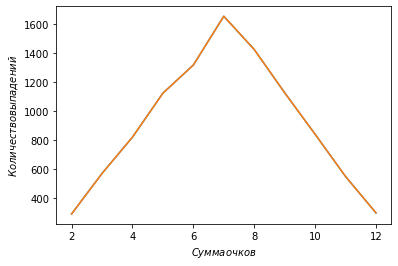

In [198]:
plt.plot(pt.index, pt['len'])
plt.ylabel("$Количество выпадений$")
plt.xlabel("$Сумма очков$")
plt.plot()

## Условные вероятности

### Задача 9
Из колоды (36 карт) вынимают последовательно без возвращения две карты. Найти вероятность того, что первой картой была шестерка, а второй — семерка. Найти условную вероятность того же события при условии, что обе карты бубновой масти.


Предлагается также решить задачу: 

### Задача 10
Из урны, содержащей два белых и три черных шара, последовательно извлекают два шара; вынутые шары не возвращаются. Если первый шар оказался черным, то перед вторым извлечением в урну добавляют белый шар. В противном случае состав оставшихся шаров не меняют. Найти вероятности событий:

$A$ = {извлечены два белых шара},

$B$ = {извлечены два черных шара}

Указание. Пусть событие $C_1$ = {первый шар белый}, событие $C_2$ = {второй шар белый}. Тогда $A = C_1C_2$, $B = \overline C_1 \overline C_2$ 